In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import missingno as msno
import dask.dataframe as dd
import geopandas as gpd
import statsmodels.api as sm
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("/content/amazon_prime_titles.csv")
print(df.head())

  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, Interna

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [ ]:
df.describe()

release_year
count   9668.000000
mean    2008.341849
std       18.922482
min     1920.000000
25%     2007.000000
50%     2016.000000
75%     2019.000000
max     2021.000000

In [ ]:
df.columns

NameError: name 'df' is not defined

In [ ]:
data.describe().round(2)

release_year
count       9668.00
mean        2008.34
std           18.92
min         1920.00
25%         2007.00
50%         2016.00
75%         2019.00
max         2021.00

In [ ]:
data.duplicated().sum()

0

In [ ]:
numeric_columns = data.select_dtypes(include=['number']).columns
# Fill NaN values with mean for numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [ ]:
data.isna().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
data['cast'].fillna("Unknown", inplace=True)

In [ ]:
data['director'].fillna("Unknown", inplace=True)

In [ ]:
data['date_added'].fillna("Unknown", inplace=True)

In [ ]:
most_common_country = data['country'].mode()[0]
data['country'].fillna(most_common_country, inplace=True)

In [ ]:
most_common_rating = data['rating'].mode()[0]
data['rating'].fillna(most_common_rating, inplace=True)

In [ ]:
data_remove=['description']
data=data.drop(columns=data_remove)

In [ ]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [ ]:
data.sample(10)

show_id     type                                              title  \
1369   s1370  TV Show                                      Password Plus   
9022   s9023  TV Show                                  Couple of Mirrors   
1462   s1463    Movie  Nursery Rhymes - Mother Goose Club Playhouse p...   
3457   s3458    Movie                                   53206: Milwaukee   
7520   s7521  TV Show                                         ER Doctors   
1480   s1481    Movie                          Ninja III: The Domination   
5915   s5916    Movie  Soft Sounds of Peeling Fruit: A Rising Voices ...   
5967   s5968    Movie                                             Chakwa   
5795   s5796    Movie                                           Pachchis   
5295   s5296    Movie                                               Darr   

                    director  \
1369                 Unknown   
9022                 Unknown   
1462                Sona Jho   
3457  Kimberley T. Zulkowski   
7520                 Unknown   
1480         Sam Firstenberg   
5915               Shelly Yo   
5967      Jatin Satish Wagle   
5795   Sri Krishna, Rama Sai   
5295             Yash Chopra   

                                                   cast        country  \
1369                                       Allen Ludden  United States   
9022  Zhang Nan, Annie Sun, Prince Liu, Vincent He, ...  United States   
1462                                  Mother Goose Club  United States   
3457  Imani Brown, Carnellious Gill, Terrell Lewis, ...  United States   
7520                           Zhang Jiayi, Wang Luodan  United States   
1480         Shô Kosugi, Lucinda Dickey, Jordan Bennett  United States   
5915  Shannon Young Cho, Luke Kim, Greena Park, Sook...  United States   
5967  Atul Kulkarni, Mukta Barve, Deepa Parab, Shara...  United States   
5795  Raamz, Swetaa Varma, Ravi Varma, John Kottoly,...  United States   
5295            Shah Rukh Khan, Juhi Chawla, Sunny Deol          India   

     date_added  release_year rating  duration  \
1369    Unknown          1979   TV-G  1 Season   
9022    Unknown          2021    13+  1 Season   
1462    Unknown          2015    ALL    41 min   
3457    Unknown          2021    16+    83 min   
7520    Unknown          2017    13+  1 Season   
1480    Unknown          1984      R    93 min   
5915    Unknown          2021    13+    14 min   
5967    Unknown          2003    ALL   131 min   
5795    Unknown          2021    16+   128 min   
5295    Unknown          1993    13+   177 min   

                            listed_in  
1369                       Unscripted  
9022                          Romance  
1462  Kids, Music Videos and Concerts  
3457                            Drama  
7520                         TV Shows  
1480                           Action  
5915                            Drama  
5967                         Suspense  
5795                 Action, Suspense  
5295   Drama, International, Suspense

In [ ]:
data['rating'].unique()

array(['13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+', 'TV-PG',
       '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G', 'PG',
       'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [ ]:
rating_counts = data['rating'].value_counts()
rating_counts

13+         2454
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: rating, dtype: int64

In [ ]:
# Exclude rows where the director is "Unknown"
filtered_directors = data[data['director'] != 'Unknown']
top_directors = filtered_directors['director'].value_counts().head(10)
print("Top 10 Prolific Directors:")
print(top_directors)
# Exclude rows where the cast is "Unknown"
filtered_actors = data[data['cast'] != 'Unknown']
top_actors = filtered_actors['cast'].value_counts().head(10)
print("\nTop 10 Prolific Actors:")
print(top_actors)

Top 10 Prolific Directors:
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Manny Rodriguez           22
John English              20
1                         16
Brian Volk-Weiss          15
Baeble Music              14
Name: director, dtype: int64

Top 10 Prolific Actors:
Maggie Binkley                      56
1                                   34
Anne-Marie Newland                  24
Cassandra Peterson                  21
Grace Tamayo, Erin Webbs            17
Gene Autry, Champion, Gail Davis    12
Stevin John                         11
Gallagher                            9
LB, Aaron Michael                    9
Eddie Izzard                         9
Name: cast, dtype: int64


# Data Cleaning
# Handling Missing Values

In [ ]:
#How Many Null values present in a column
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64


In [ ]:
#Duplicate values are present or not ,True indicates Duplicate values present, False Duplicates values not present
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
9663    False
9664    False
9665    False
9666    False
9667    False
Length: 9668, dtype: bool


In [ ]:
#Removing null values
df=df.dropna()
print(df.isnull().sum())


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


# Feature Engineering
# creating new features from existing


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month
df['added_day'] = df['date_added'].dt.day
df.drop('date_added', axis=1, inplace=True)
print(df.head())


  show_id   type                 title      director  \
1      s2  Movie  Take Care Good Night  Girish Joshi   

                                               cast country  release_year  \
1  Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar   India          2018   

  rating duration             listed_in  \
1    13+  110 min  Drama, International   

                                         description  added_year  added_month  \
1  A Metro Family decides to fight a Cyber Crimin...        2021            3   

   added_day  
1         30  


<ipython-input-11-607526f95b19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = pd.to_datetime(df['date_added'])
<ipython-input-11-607526f95b19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['added_year'] = df['date_added'].dt.year
<ipython-input-11-607526f95b19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

## Data transformation

In [ ]:
#Since there is only One numerical column [release_year], sorting the whole dataset according to release_year

In [ ]:
import pandas as pd
data=pd.read_csv("/content/amazon_prime_titles.csv")
print(data)
df = pd.DataFrame(data)

df_sorted = df.sort_values(by='release_year')
print(df_sorted)

     show_id     type                    title         director  \
0         s1    Movie      The Grand Seduction     Don McKellar   
1         s2    Movie     Take Care Good Night     Girish Joshi   
2         s3    Movie     Secrets of Deception      Josh Webber   
3         s4    Movie       Pink: Staying True   Sonia Anderson   
4         s5    Movie            Monster Maker     Giles Foster   
...      ...      ...                      ...              ...   
9663   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664   s9665  TV Show            Planet Patrol              NaN   
9665   s9666    Movie                  Outpost     Steve Barker   
9666   s9667  TV Show  Maradona: Blessed Dream              NaN   
9667   s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast         country  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1      Mahesh Manjrekar, Abhay Mahajan, Sachi

In [ ]:
# Creating a new file which have the sorted data
df_sorted.to_csv('sorted_data.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
# Reshape the 'release_year' column to a 2D array for fitting the scaler
release_year_reshaped = df['release_year'].values.reshape(-1, 1)
df['release_year_scaled'] = scaler.fit_transform(release_year_reshaped)

print(df)

     show_id     type                    title         director  \
0         s1    Movie      The Grand Seduction     Don McKellar   
1         s2    Movie     Take Care Good Night     Girish Joshi   
2         s3    Movie     Secrets of Deception      Josh Webber   
3         s4    Movie       Pink: Staying True   Sonia Anderson   
4         s5    Movie            Monster Maker     Giles Foster   
...      ...      ...                      ...              ...   
9663   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664   s9665  TV Show            Planet Patrol              NaN   
9665   s9666    Movie                  Outpost     Steve Barker   
9666   s9667  TV Show  Maradona: Blessed Dream              NaN   
9667   s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast         country  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1      Mahesh Manjrekar, Abhay Mahajan, Sachi

## Data Splitting

In [ ]:
# Mainly data splitting is a crucial step in machine learning by using which
# we divide train data and test data.
# For our dataset, data splitting will not infer any meaning.

**EXPLORATORY DATA ANALYSIS**

In [ ]:
df=pd.read_csv("/content/amazon_prime_titles.csv")
print(df)


     show_id     type                    title         director  \
0         s1    Movie      The Grand Seduction     Don McKellar   
1         s2    Movie     Take Care Good Night     Girish Joshi   
2         s3    Movie     Secrets of Deception      Josh Webber   
3         s4    Movie       Pink: Staying True   Sonia Anderson   
4         s5    Movie            Monster Maker     Giles Foster   
...      ...      ...                      ...              ...   
9663   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664   s9665  TV Show            Planet Patrol              NaN   
9665   s9666    Movie                  Outpost     Steve Barker   
9666   s9667  TV Show  Maradona: Blessed Dream              NaN   
9667   s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast         country  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1      Mahesh Manjrekar, Abhay Mahajan, Sachi

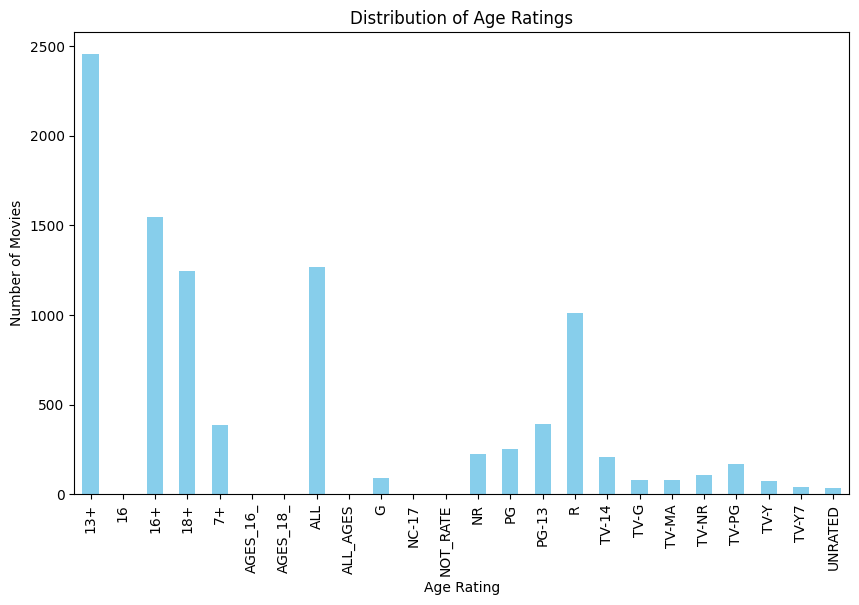

In [ ]:
plt.figure(figsize=(10, 6))
rating_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Ratings')
plt.xlabel('Age Rating')
plt.ylabel('Number of Movies')
plt.show()

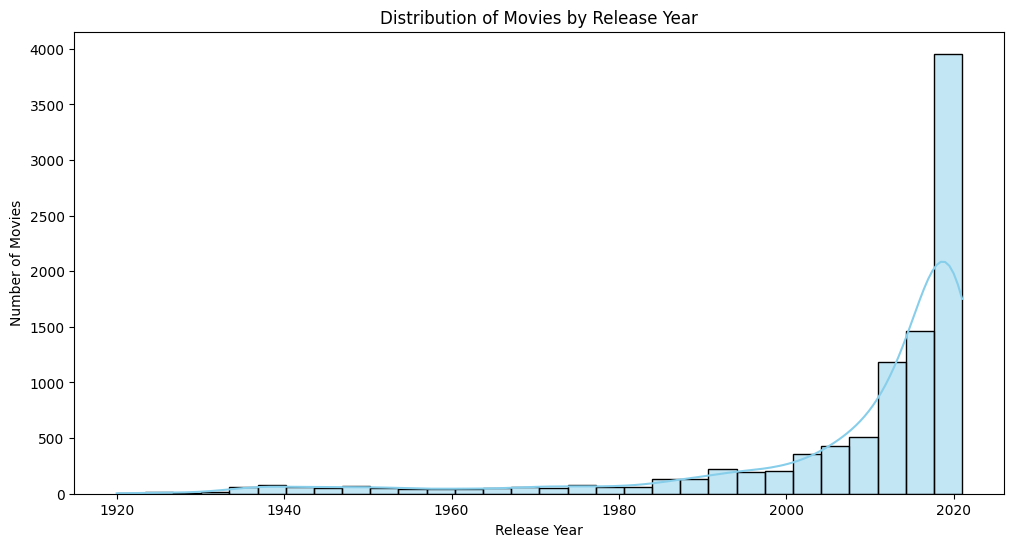

In [ ]:
# Distribution of movies by release year
plt.figure(figsize=(12, 6))
sns.histplot(data['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

<ipython-input-53-5dd9c1739a4b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index, palette='viridis')


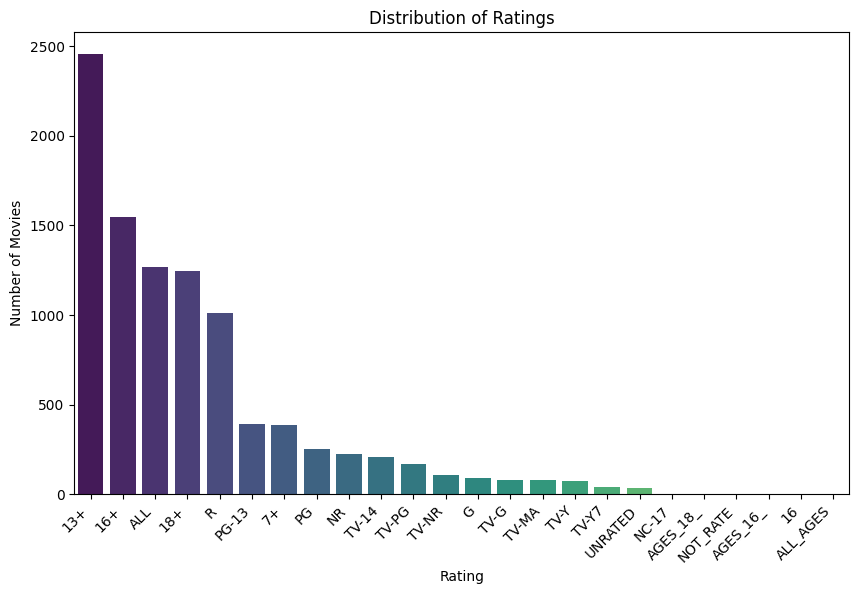

In [ ]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

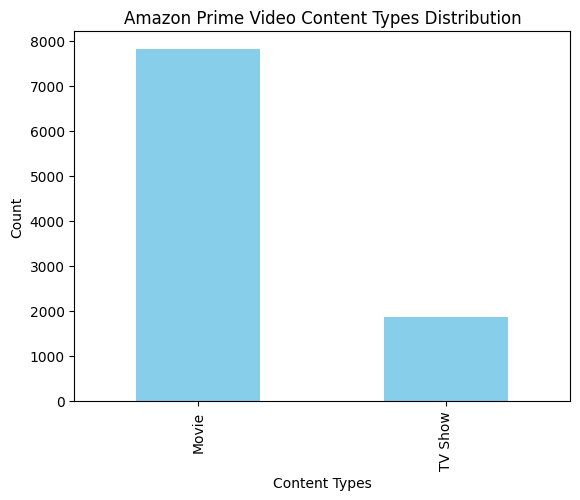

In [ ]:
# Count the occurrences of each content type
content_type_counts = df['type'].value_counts()
# Create a bar plot
content_type_counts.plot(kind='bar', color='skyblue')
# Add labels and title
plt.xlabel('Content Types')
plt.ylabel('Count')
plt.title('Amazon Prime Video Content Types Distribution')
plt.show()


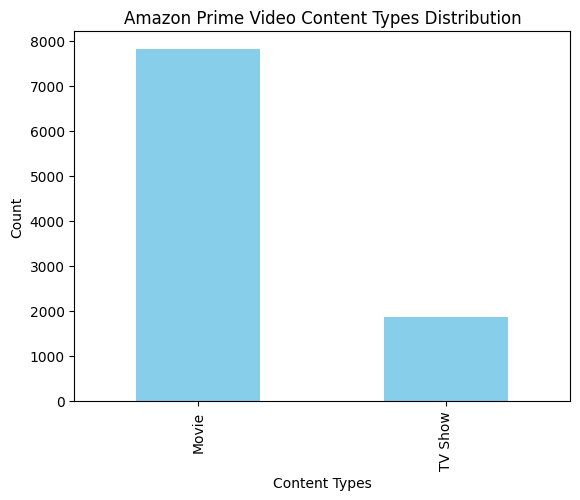

In [ ]:
# Count the occurrences of each content type
content_type_counts = df['type'].value_counts()
# Create a bar plot
content_type_counts.plot(kind='bar', color='skyblue')
# Add labels and title
plt.xlabel('Content Types')
plt.ylabel('Count')
plt.title('Amazon Prime Video Content Types Distribution')
plt.show()


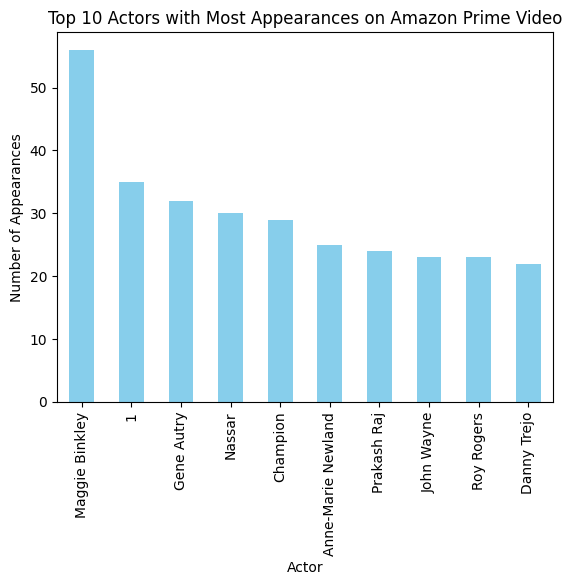

In [ ]:
# Split the 'cast' column into individual actors
all_actors = df['cast'].str.split(', ', expand=True).stack()
# Count the occurrences of each actor
actor_counts = all_actors.value_counts().head(10)  # You can adjust the number of actors to display
# Create a bar plot
actor_counts.plot(kind='bar', color='skyblue')
# Add labels and title
plt.xlabel('Actor')
plt.ylabel('Number of Appearances')
plt.title('Top 10 Actors with Most Appearances on Amazon Prime Video')
plt.show()

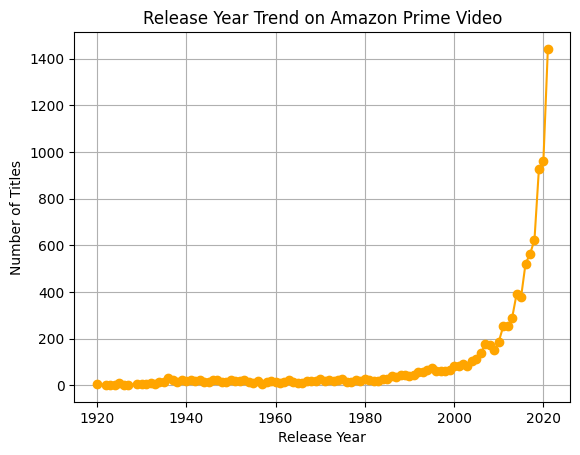

In [ ]:
# Count the occurrences of each release year
release_year_counts = df['release_year'].value_counts().sort_index()
# Create a line plot
release_year_counts.plot(kind='line', marker='o', color='orange')
# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Release Year Trend on Amazon Prime Video')
plt.grid(True)
plt.show()

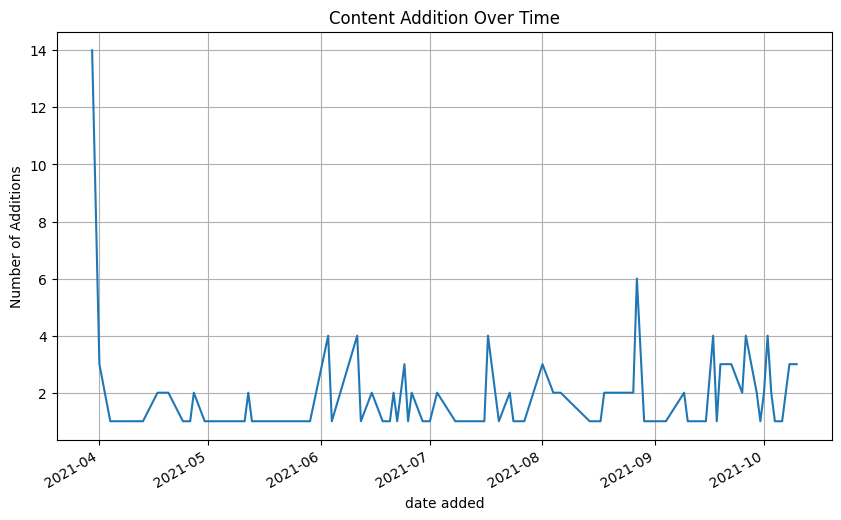

In [ ]:
#Line Plot for Content Addition Over Time (Date_Added)
# Convert 'Date_Added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])
# Group by 'date_added' and count the number of additions
content_addition_over_time = df.groupby('date_added').size()
# Plotting
plt.figure(figsize=(10, 6))
content_addition_over_time.plot()
plt.title('Content Addition Over Time')
plt.xlabel('date added')
plt.ylabel('Number of Additions')
plt.grid(True)
plt.show()

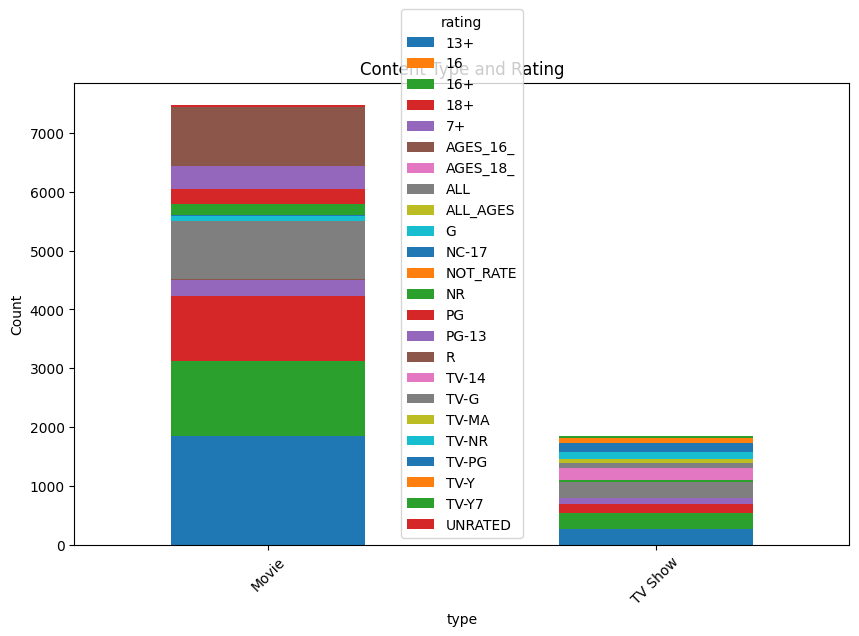

In [ ]:
# 2. Stacked Bar Plot for Content Type and Rating (Type, Rating)
content_type_rating = df.groupby(['type', 'rating']).size().unstack()
content_type_rating.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Content Type and Rating')
plt.xlabel('type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='rating')
plt.show()

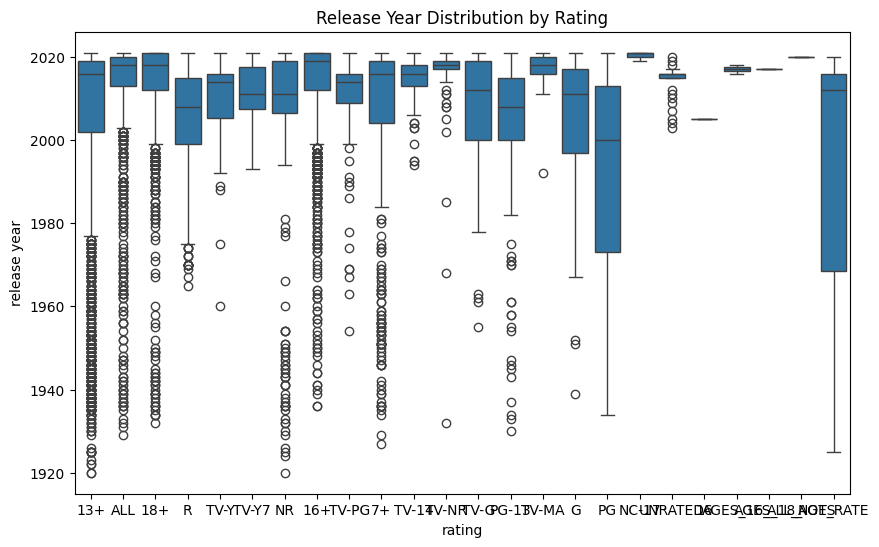

In [ ]:
# 3. Box Plot for Release Year Distribution by Rating (Rating, Release_Year)
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='release_year', data=df)
plt.title('Release Year Distribution by Rating')
plt.xlabel('rating')
plt.ylabel('release year')
plt.show()

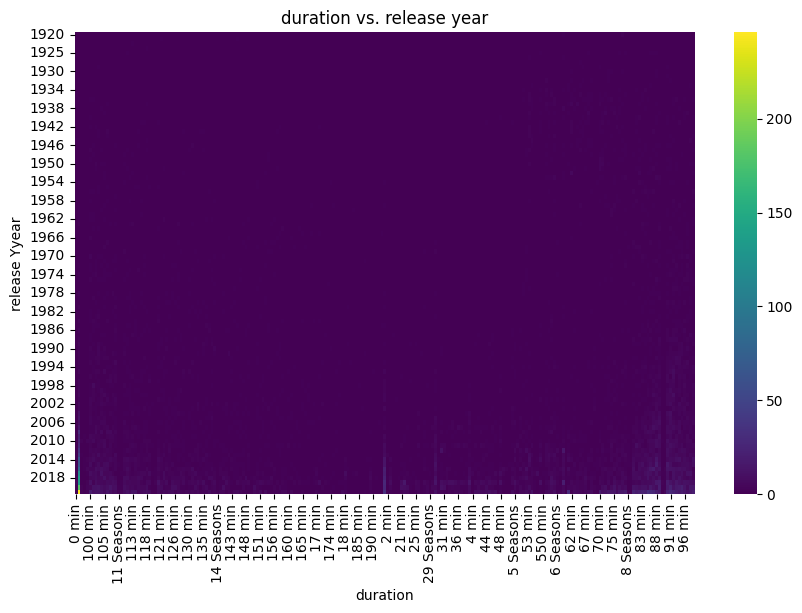

In [ ]:
# 4. Heatmap for Duration vs. Release Year (Duration, Release_Year)
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot_table(index='release_year', columns='duration', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('duration vs. release year')
plt.xlabel('duration')
plt.ylabel('release Yyear')
plt.show()

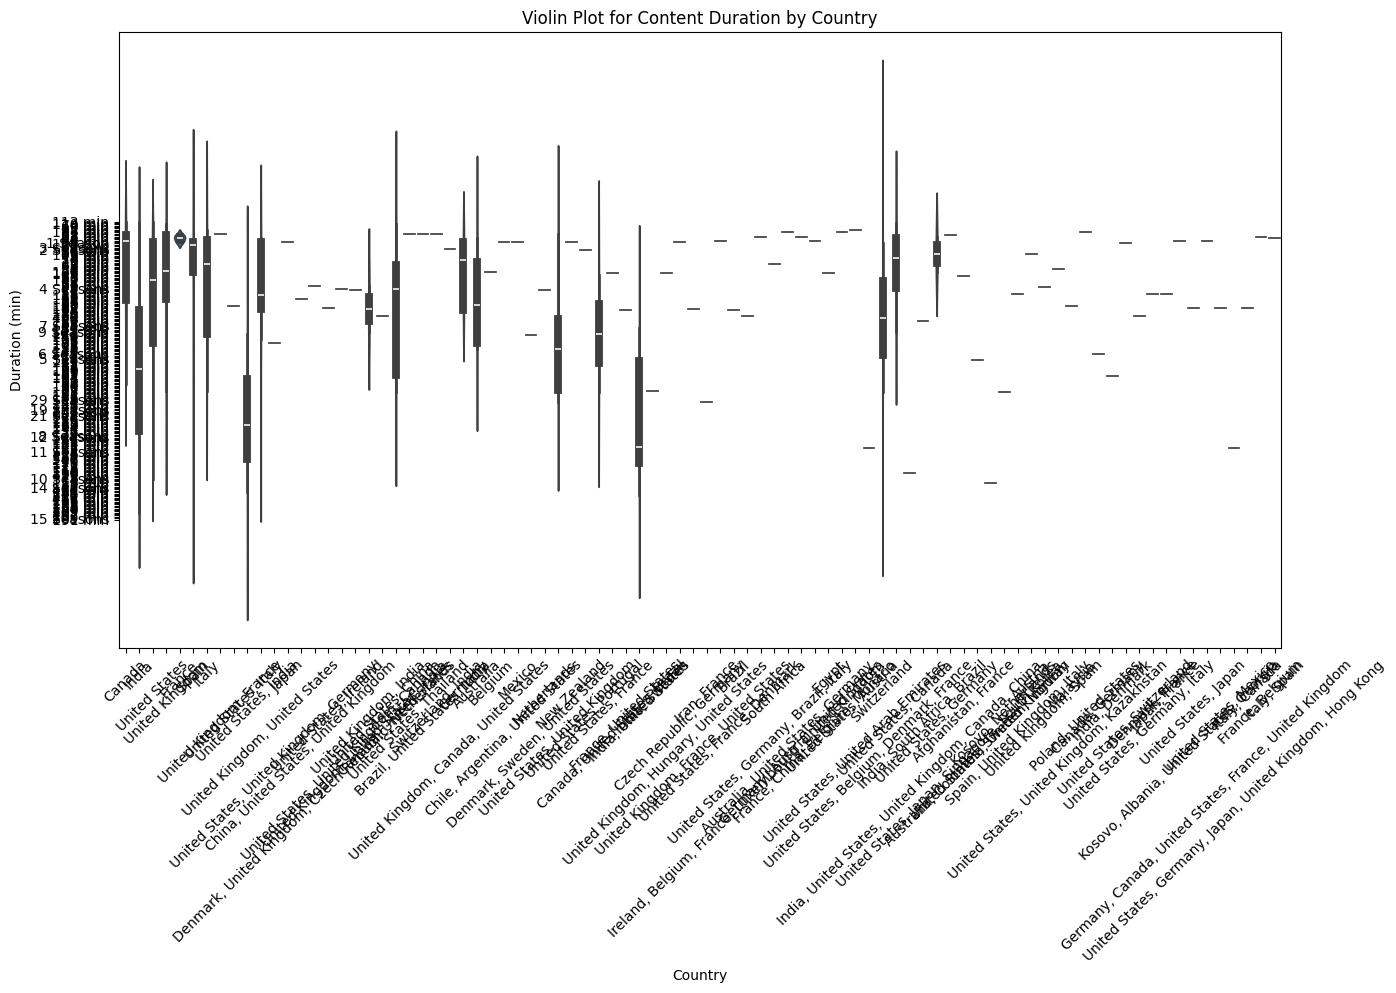

In [ ]:
## Violin Plot for Content Duration by Country (Country, Duration)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.violinplot(x='country', y='duration', data=df)
plt.xticks(rotation=45)
plt.title('Violin Plot for Content Duration by Country')
plt.xlabel('Country')
plt.ylabel('Duration (min)')
plt.show()

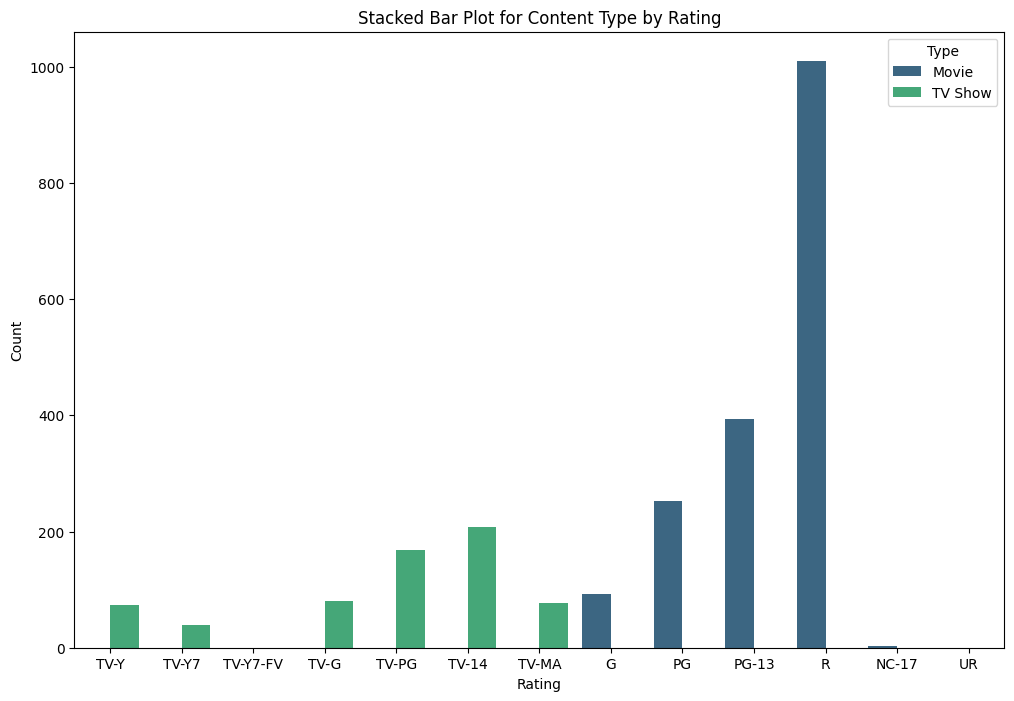

In [ ]:
## Stacked Bar Plot for Content Type by Rating (Type, Rating)
rating_order = ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA', 'G', 'PG', 'PG-13', 'R', 'NC-17', 'UR']
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', hue='type', data=df, order=rating_order, palette='viridis')
plt.title('Stacked Bar Plot for Content Type by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Type', loc='upper right')
plt.show()

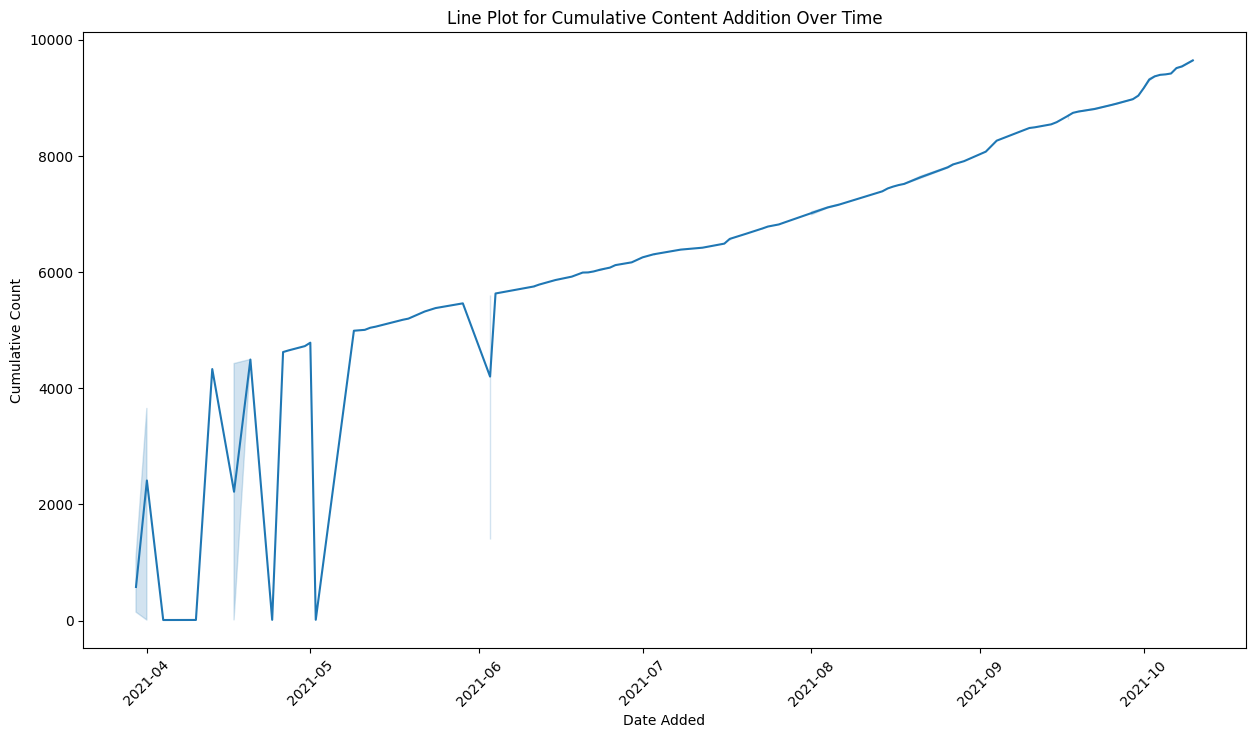

In [ ]:
## Line Plot for Cumulative Content Addition Over Time (Date_Added)
df['date_added'] = pd.to_datetime(df['date_added'])
df['cumulative_count'] = range(1, len(df) + 1)
plt.figure(figsize=(15, 8))
sns.lineplot(x='date_added', y='cumulative_count', data=df)
plt.title('Line Plot for Cumulative Content Addition Over Time')
plt.xlabel('Date Added')
plt.ylabel('Cumulative Count')
plt.xticks(rotation=45)
plt.show()

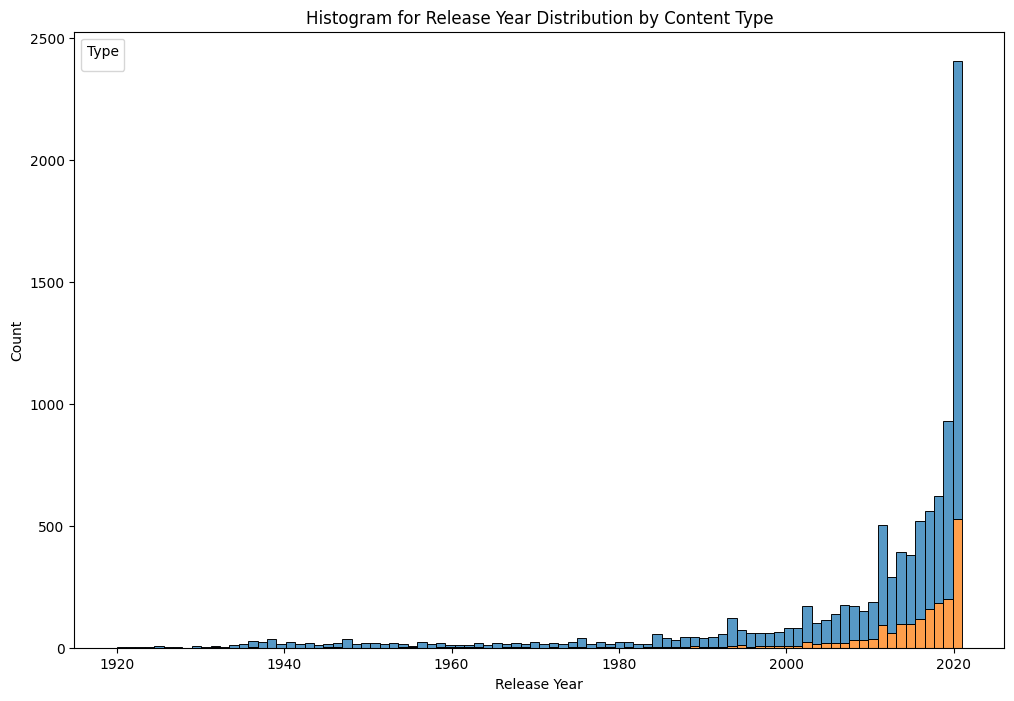

In [ ]:
## Histogram for Release Year Distribution by Content Type (Release_Year, Type)
plt.figure(figsize=(12, 8))
sns.histplot(x='release_year', hue='type', data=df, multiple='stack', palette='tab10')
plt.title('Histogram for Release Year Distribution by Content Type')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Type', loc='upper left')
plt.show()

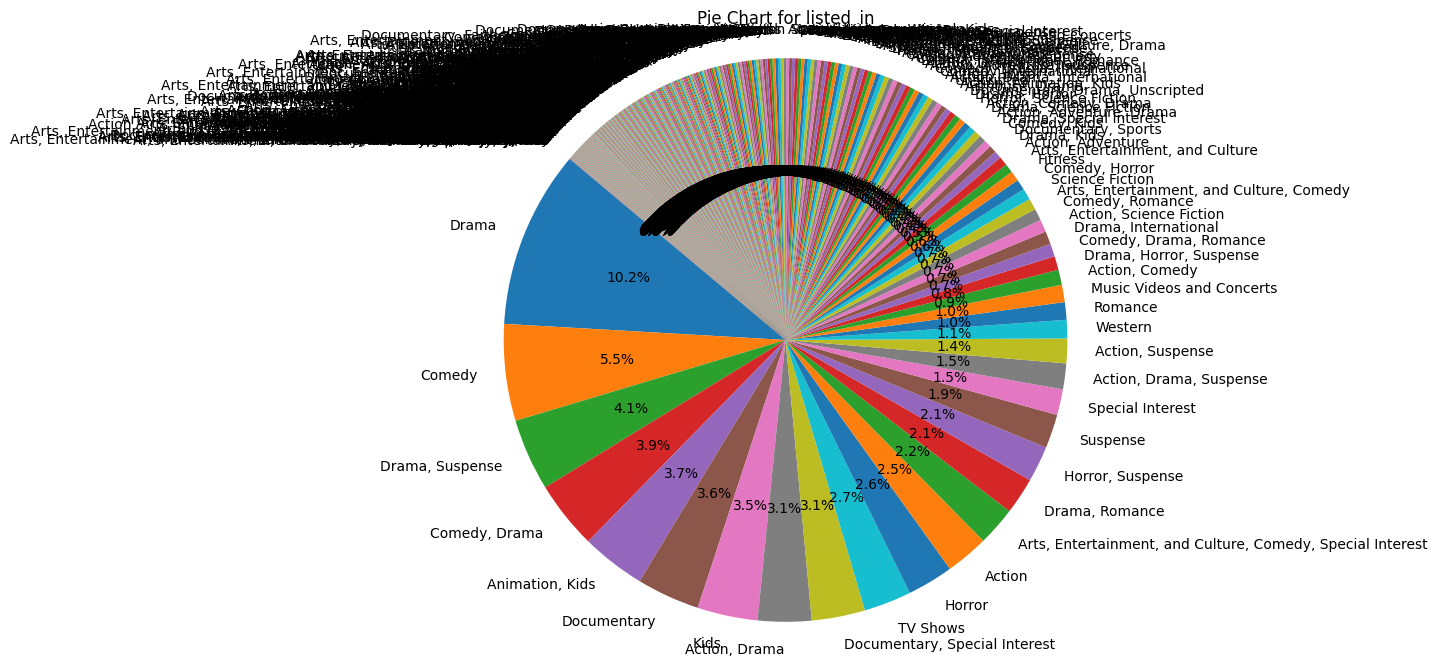

In [ ]:
data = pd.read_csv('/content/amazon_prime_titles.csv')
column_to_plot = 'listed_in'
column_counts = data[column_to_plot].value_counts()
#Plot the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart for {}'.format(column_to_plot))
plt.axis('equal')
plt.show()

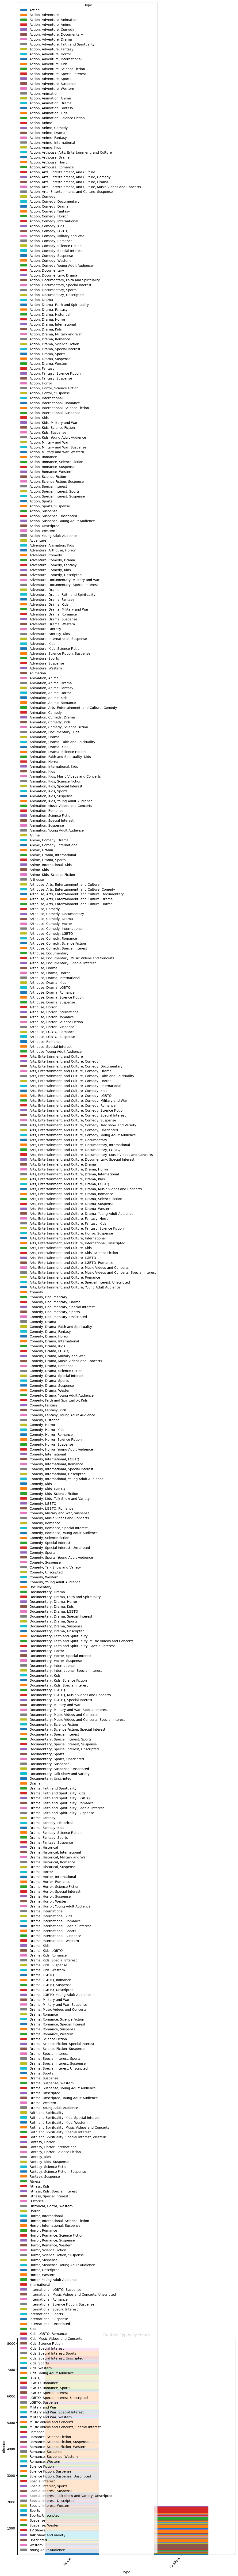

In [ ]:
grouped_df = df.groupby(['type', 'listed_in']).size().unstack(fill_value=0)
# Plotting
grouped_df.plot(kind='bar', stacked=True, figsize=(12,12))
plt.xlabel('Type')
plt.ylabel('director')
plt.title('Content Types by Genre')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')
plt.show()



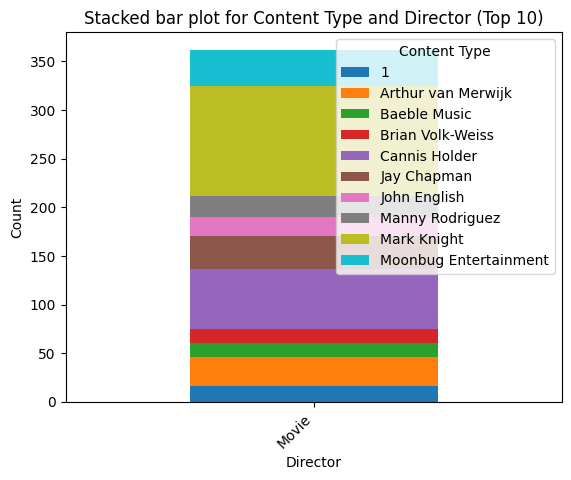

In [ ]:
#Stacked Bar Plot for Content Type by Director (Type, Director)
df = pd.DataFrame(data)
# Get the top N directors by title count
top_directors = df['director'].value_counts().nlargest(10).index
# Filter DataFrame to include only the top N directors
df_filtered = df[df['director'].isin(top_directors)]
# Group by 'type' and 'director' and count occurrences
grouped_df = df_filtered.groupby(['type', 'director']).size().unstack(fill_value=0)
# Plotting
fig, ax = plt.subplots()
grouped_df.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Stacked bar plot for Content Type and Director (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Type')
plt.show()


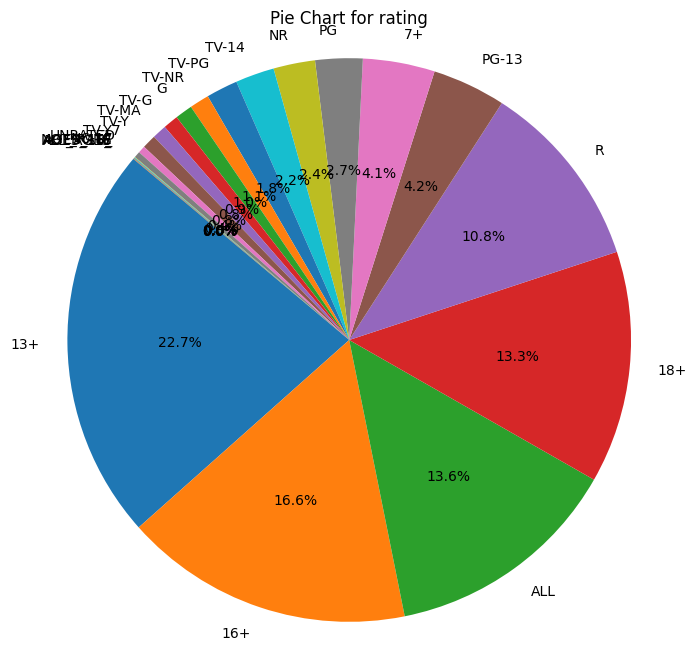

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
column_to_plot = 'rating'
column_counts = data[column_to_plot].value_counts()
#Plot the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart for {}'.format(column_to_plot))
plt.axis('equal')
plt.show()

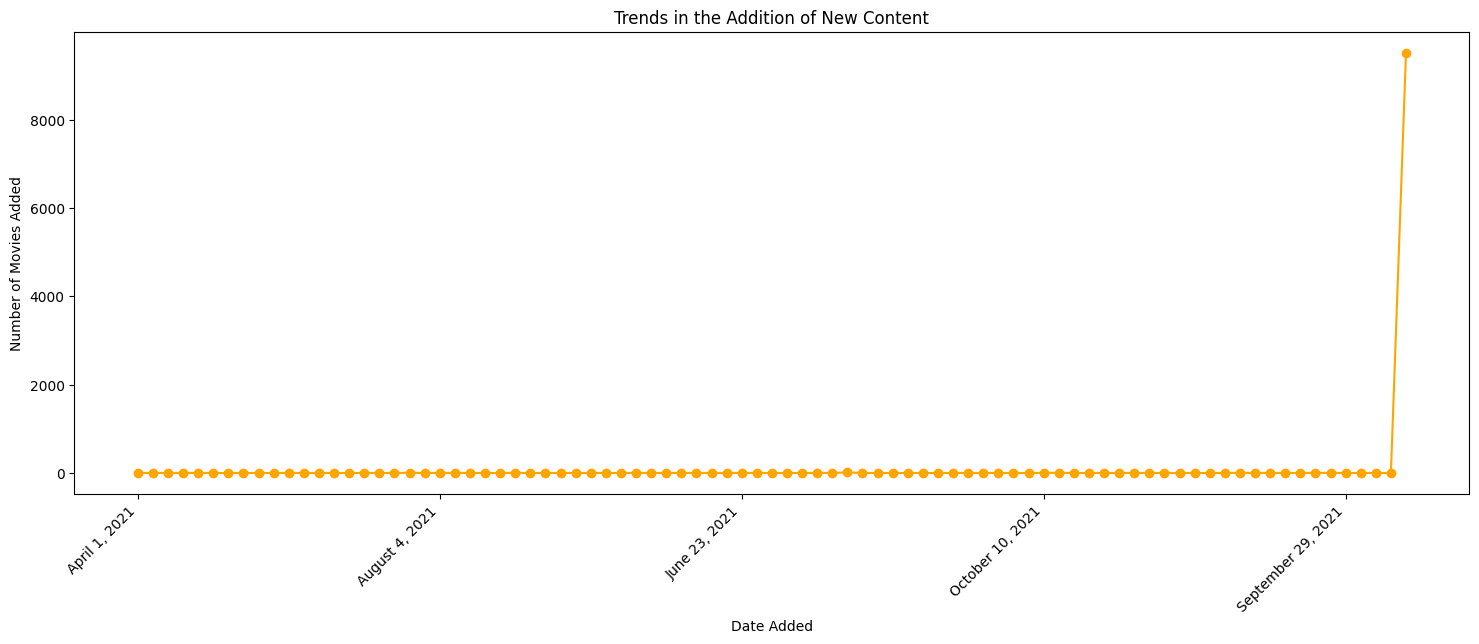

In [ ]:
# Trends or patterns in the addition of new content
date_added_trends = data.groupby('date_added')['show_id'].count()
plt.figure(figsize=(18, 6))
date_added_trends.plot(marker='o', linestyle='-', color='orange')
plt.title('Trends in the Addition of New Content')
plt.xlabel('Date Added')
plt.ylabel('Number of Movies Added')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-55-f094f57e32a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')


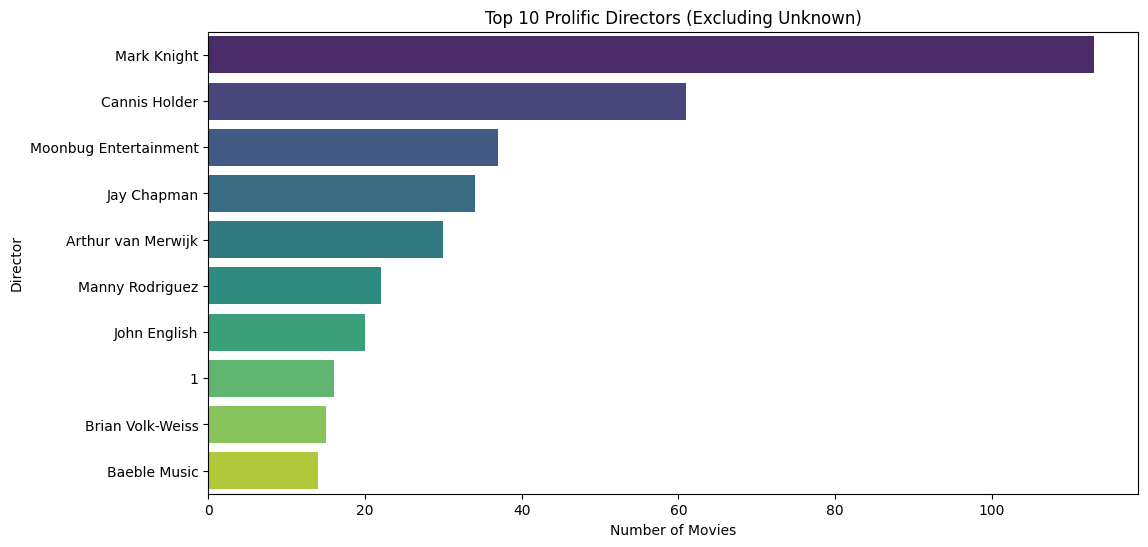

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Prolific Directors (Excluding Unknown)')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

<ipython-input-56-4475e29578e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='plasma')


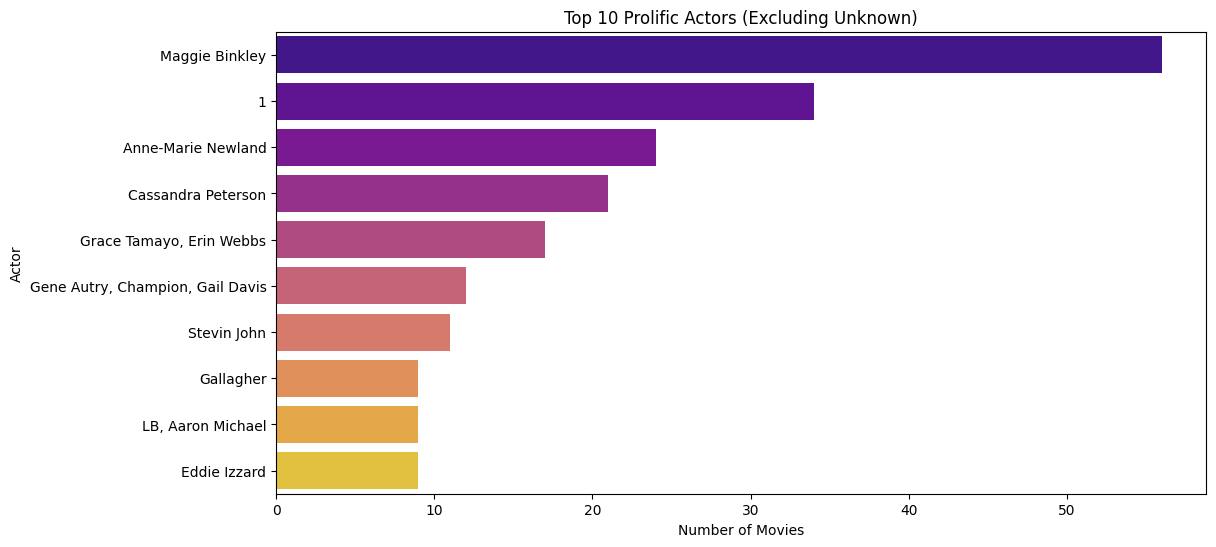

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='plasma')
plt.title('Top 10 Prolific Actors (Excluding Unknown)')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

<ipython-input-57-63e6910de46f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='muted')


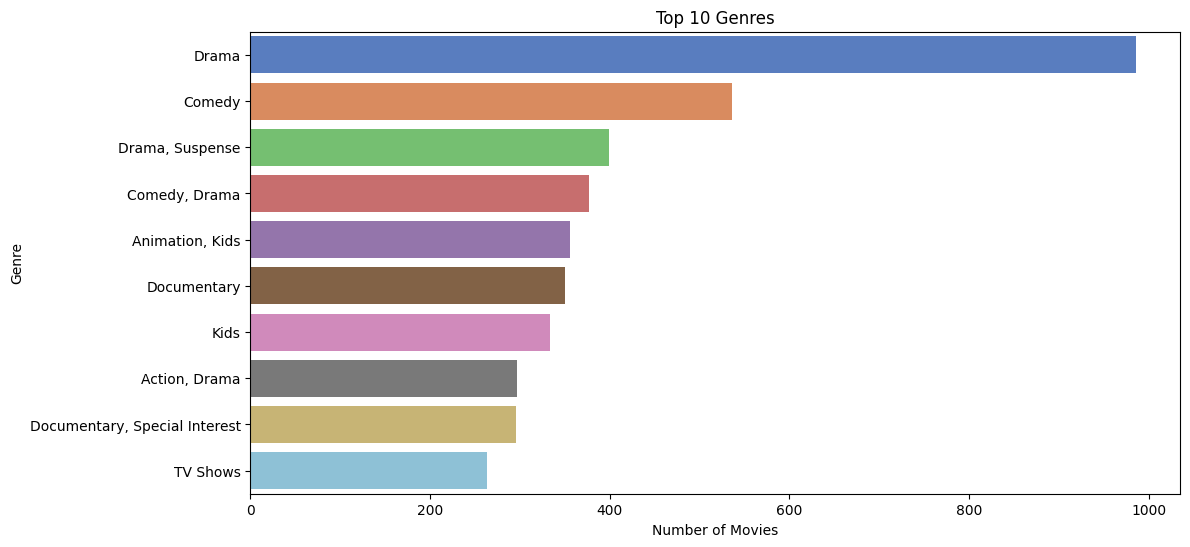

In [ ]:
# Top genres
top_genres = data['listed_in'].value_counts().head(10)
# Plot Top Genres
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='muted')
plt.title('Top 10 Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

<ipython-input-58-02474a7a4108>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette='viridis')


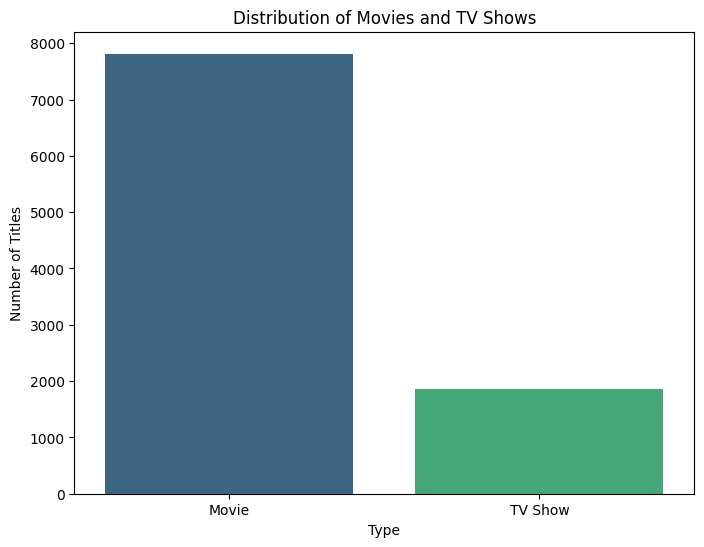

In [ ]:
# Plotting the distribution of movies and TV shows
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data, palette='viridis')
plt.title('Distribution of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.show()

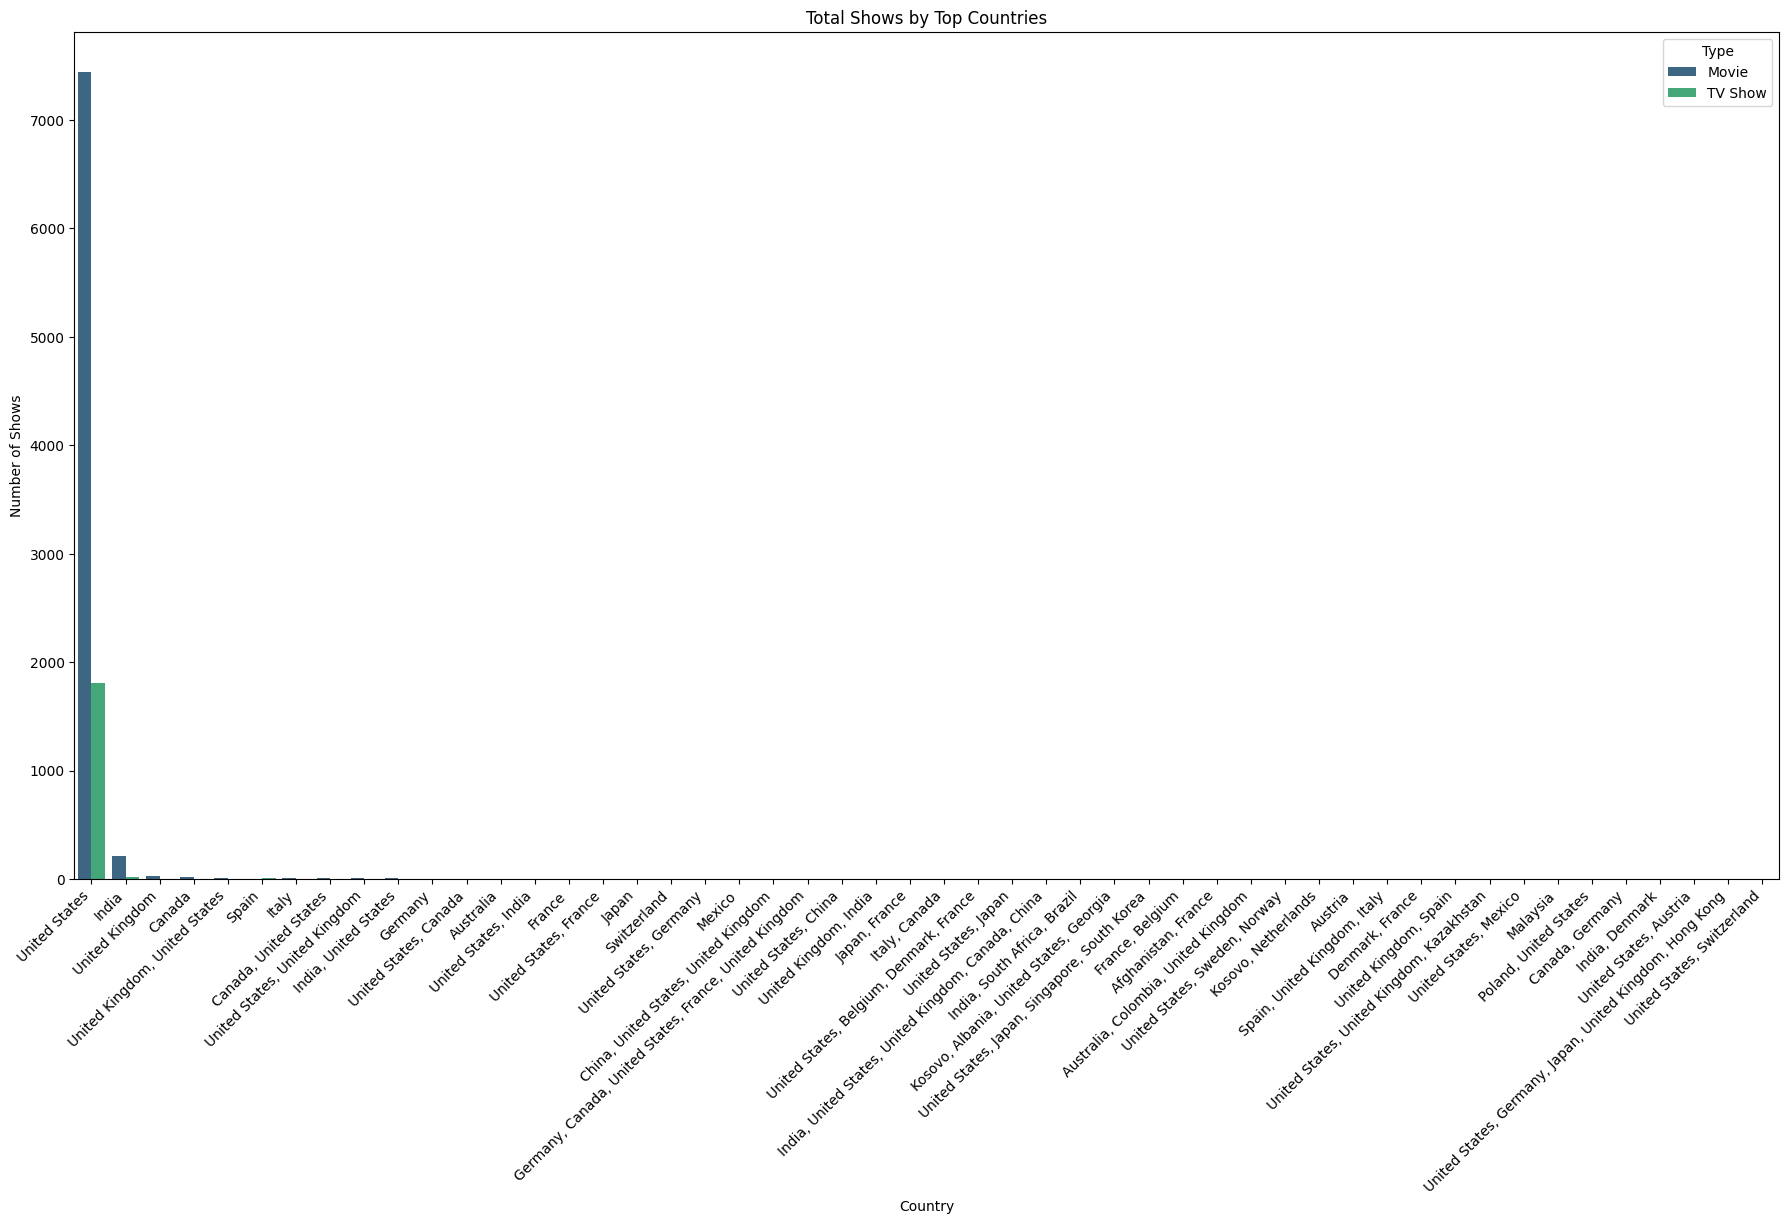

In [ ]:
# Top N countries
top_countries = data['country'].value_counts().head(50).index
# Filter the data for the top countries
filtered_data = data[data['country'].isin(top_countries)]
# Visualize the total shows by country for the top countries
plt.figure(figsize=(22, 11))
sns.countplot(x='country', data=filtered_data, hue='type', order=top_countries, palette='viridis')
plt.title('Total Shows by Top Countries')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.legend(title='Type', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

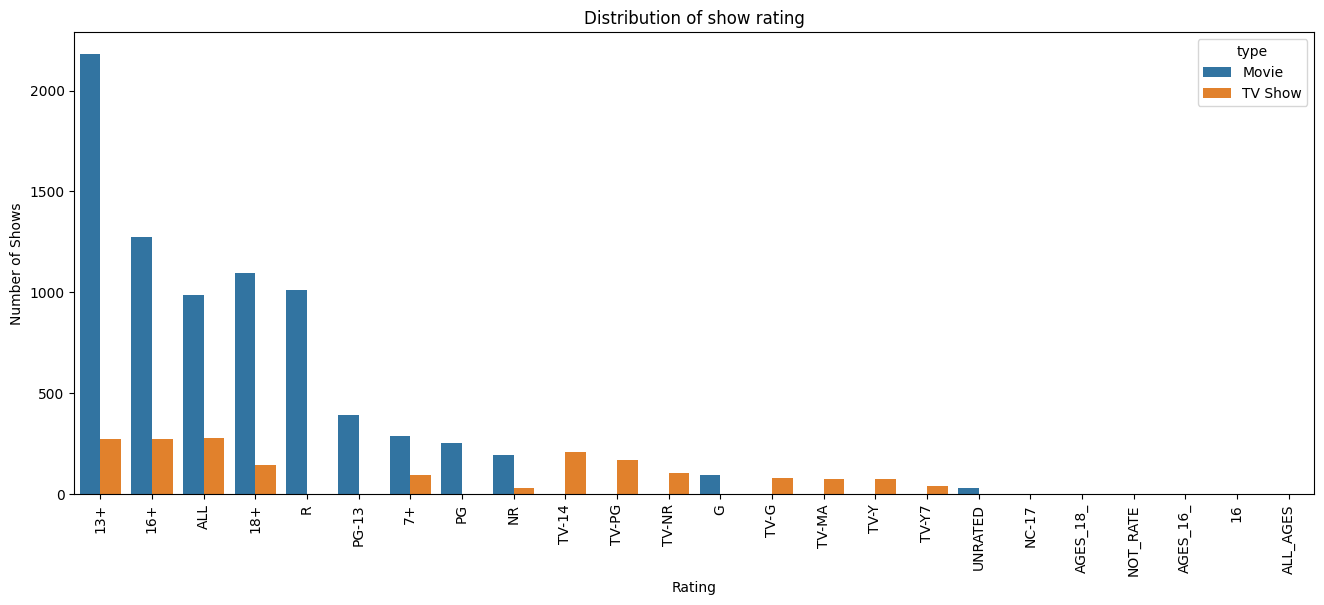

In [ ]:
data_count1=data['rating'].value_counts().reset_index()
plt.figure(figsize=(16,6))
sns.countplot(x='rating',data=data,hue='type',order=data['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of show rating')
plt.xlabel('Rating')
plt.ylabel('Number of Shows')
plt.show()